In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()
x=df.drop(columns=["median_house_value"])
y=df["median_house_value"]

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
sc=StandardScaler()
sc.fit(xtrain)
sc_xtrain=sc.transform(xtrain)
sc_xtest=sc.transform(xtest)

In [6]:
xtrain.shape

(13600, 8)

In [7]:
from keras.layers import Dense
from keras.models import Sequential
model=Sequential()
model.add(Dense(15,activation='relu',input_dim=8))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                135       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


In [35]:
from keras.optimizers import SGD


In [29]:
model.compile(loss="mean_absolute_error",optimizer=SGD(),metrics=["mse"])

In [30]:
history=model.fit(sc_xtrain,ytrain,epochs=25,batch_size=10)

Epoch 1/25
1360/1360 [==============================] - 2s 1ms/step - loss: 91600.5125 - mse: 13696250520.3586
Epoch 2/25
1360/1360 [==============================] - 1s 1ms/step - loss: 91542.0250 - mse: 13736161045.2550
Epoch 3/25
1360/1360 [==============================] - 1s 1ms/step - loss: 90719.4813 - mse: 13447373693.0845
Epoch 4/25
1360/1360 [==============================] - 1s 1ms/step - loss: 92151.3767 - mse: 13827281031.4298
Epoch 5/25
1360/1360 [==============================] - 1s 1ms/step - loss: 90282.3016 - mse: 13320930518.4306
Epoch 6/25
1360/1360 [==============================] - 1s 1ms/step - loss: 90420.4983 - mse: 13428662086.1602
Epoch 7/25
1360/1360 [==============================] - 1s 1ms/step - loss: 91635.6558 - mse: 13638425619.5621
Epoch 8/25
1360/1360 [==============================] - 1s 1ms/step - loss: 90630.3266 - mse: 13553844856.0059
Epoch 9/25
1360/1360 [==============================] - 2s 1ms/step - loss: 90805.6946 - mse: 13521084488.9816
E

In [31]:
history.history.keys()

dict_keys(['loss', 'mse'])

In [18]:
model.evaluate(sc_xtrain,ytrain)

425/425 [==============================] - 0s 887us/step - loss: 13611565056.0000


13611565056.0

In [19]:
model.evaluate(sc_xtest,ytest)

107/107 [==============================] - 0s 1ms/step - loss: 12878766080.0000


12878766080.0

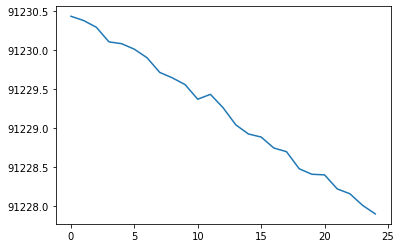

In [33]:
plt.plot(history.history["loss"])

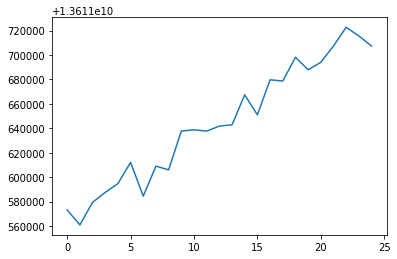

In [34]:
plt.plot(history.history["mse"])

In [28]:
ypred=model.predict(sc_xtest)

In [26]:
ypred

array([[203617.97],
       [203617.97],
       [203617.97],
       ...,
       [203617.97],
       [203617.97],
       [203617.97]], dtype=float32)

In [25]:
pd.DataFrame({"Actual":np.array(ytest).flatten(),"Predicted":ypred.flatten()})

,Actual,Predicted
0,171400.0,203617.96875
1,189600.0,203617.96875
2,500001.0,203617.96875
3,229400.0,203617.96875
4,163400.0,203617.96875
...,...,...
3395,212500.0,203617.96875
3396,210500.0,203617.96875
3397,142900.0,203617.96875
3398,128300.0,203617.96875
